In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import tensorflow.keras as kb
from tensorflow.keras import backend
import tensorflow as tf
from plotnine import *


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/Music_data.csv")

print(df.shape)
df.head()

(2553, 14)


,Unnamed: 0,artist_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,duration_ms,track_name
0,1,Jonas Brothers,0.594,0.464,0,-7.898,1,0.0340,0.306000,0.000000,0.1870,0.545,193866,Please Be Mine
1,2,Jonas Brothers,0.582,0.697,7,-3.842,1,0.0695,0.000745,0.000000,0.1850,0.701,153346,S.O.S.
2,3,Jonas Brothers,0.442,0.961,1,-2.914,1,0.0928,0.000035,0.000036,0.0619,0.405,168480,Mandy
3,4,Jonas Brothers,0.659,0.857,11,-5.850,1,0.0437,0.004500,0.000002,0.3350,0.798,201960,Year 3000
4,5,Jonas Brothers,0.468,0.893,11,-3.554,1,0.1300,0.003890,0.000000,0.3670,0.810,164973,Hold On


In [3]:
df = df.dropna()

In [4]:
feats = ["danceability", "energy", "loudness","acousticness"]
predict = "valence"

X = df[feats]
y = df[predict]

In [5]:
# Regression

#structure of the model
model = kb.Sequential([
    kb.layers.Dense(4, input_shape=[4]),
    kb.layers.Dense(1)
])

#how to train the model
model.compile(loss = "mean_squared_error",
             optimizer = kb.optimizers.SGD())

#fit the model (same as SKlearn)
model.fit(X,y, epochs = 100)

Epoch 1/100
2553/2553 [==============================] - 0s 80us/step - loss: 0.1547
Epoch 2/100
2553/2553 [==============================] - 0s 32us/step - loss: 0.0559
Epoch 3/100
2553/2553 [==============================] - 0s 32us/step - loss: 0.0471
Epoch 4/100
2553/2553 [==============================] - 0s 31us/step - loss: 0.0439
Epoch 5/100
2553/2553 [==============================] - 0s 23us/step - loss: 0.0431
Epoch 6/100
2553/2553 [==============================] - 0s 25us/step - loss: 0.0420
Epoch 7/100
2553/2553 [==============================] - 0s 26us/step - loss: 0.0416
Epoch 8/100
2553/2553 [==============================] - 0s 30us/step - loss: 0.0410
Epoch 9/100
2553/2553 [==============================] - 0s 28us/step - loss: 0.0410
Epoch 10/100
2553/2553 [==============================] - 0s 25us/step - loss: 0.0405
Epoch 11/100
2553/2553 [==============================] - 0s 30us/step - loss: 0.0402
Epoch 12/100
2553/2553 [==============================] - 0s 38

In [8]:
Xn = X.to_numpy()

y_pred = model.predict(Xn).flatten()

true_pred = pd.DataFrame({"true": y, "pred": y_pred})

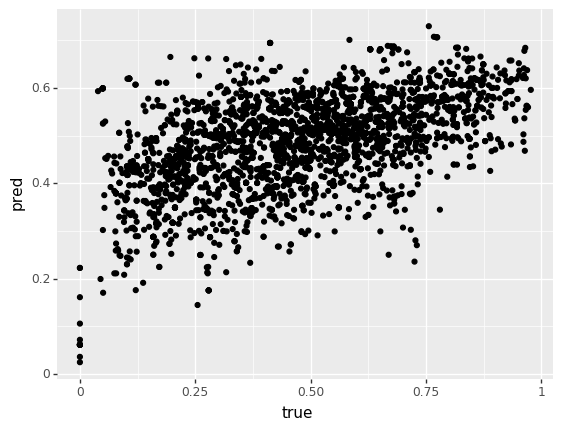

<ggplot: (317994695)>

In [9]:
(ggplot(true_pred, aes(x = "true", y = "pred")) + geom_point())

# In class

In [3]:
# Let's build a bigger NN, just for fun
wine = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/wineLARGE.csv")
wine = wine.dropna()

X = wine[wine.columns[0:10]]
y = wine["alcohol"]

In [4]:
wine.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
model = kb.Sequential([
    kb.layers.Dense(10, input_shape = [10]), #input
    kb.layers.Dense(5),
    kb.layers.Dense(3),
    kb.layers.Dense(1)
])

model.compile(loss = "mean_squared_error",
             optimizer = 'adam')

model.fit(X,y, epochs = 100)

Epoch 1/100
6497/6497 [==============================] - 1s 80us/step - loss: 217.2740
Epoch 2/100
6497/6497 [==============================] - 0s 39us/step - loss: 22.2562
Epoch 3/100
6497/6497 [==============================] - 0s 35us/step - loss: 13.8974
Epoch 4/100
6497/6497 [==============================] - 0s 37us/step - loss: 7.5560
Epoch 5/100
6497/6497 [==============================] - 0s 36us/step - loss: 3.7579
Epoch 6/100
6497/6497 [==============================] - 0s 38us/step - loss: 2.2624
Epoch 7/100
6497/6497 [==============================] - 0s 38us/step - loss: 1.9106
Epoch 8/100
6497/6497 [==============================] - 0s 39us/step - loss: 1.8499
Epoch 9/100
6497/6497 [==============================] - 0s 37us/step - loss: 1.8024: 0s - loss: 1.83
Epoch 10/100
6497/6497 [==============================] - 0s 38us/step - loss: 1.7744
Epoch 11/100
6497/6497 [==============================] - 0s 38us/step - loss: 1.7224
Epoch 12/100
6497/6497 [==================

6497/6497 [==============================] - 0s 47us/step - loss: 1.1293
Epoch 97/100
6497/6497 [==============================] - 0s 44us/step - loss: 1.1641
Epoch 98/100
6497/6497 [==============================] - 0s 47us/step - loss: 1.1259
Epoch 99/100
6497/6497 [==============================] - 0s 45us/step - loss: 1.1271
Epoch 100/100
6497/6497 [==============================] - 0s 38us/step - loss: 1.1252


In [6]:
Xn = X.to_numpy()

y_pred = model.predict(Xn).flatten()

true_pred = pd.DataFrame({"true": y, "pred": y_pred})

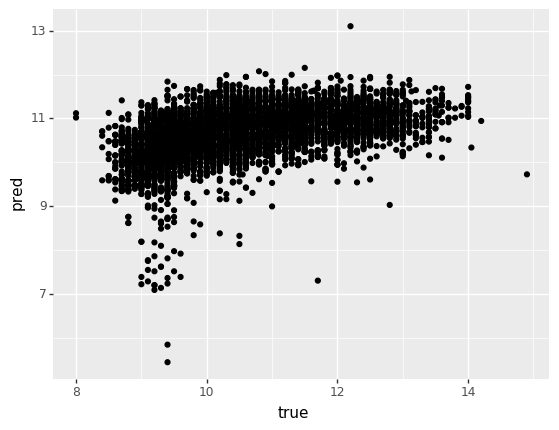

<ggplot: (318429263)>

In [7]:
(ggplot(true_pred, aes(x = "true", y = "pred")) + geom_point())